In [1]:
import os

In [3]:
os.chdir('F:\\Library\\Analytics Path\\02-R\\02-R DataSets\\K means Clustering')

In [4]:
import pandas as pd

In [5]:
churnData = pd.read_csv('Churn Data.csv')

In [7]:
churnData.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [8]:
del churnData['state']

In [9]:
del churnData['account length']

In [10]:
del churnData['phone number']

In [11]:
churnData.head()

,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [22]:
churnData.shape

(3333, 18)

In [23]:
churnData['customer service calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: customer service calls, dtype: int64

In [24]:
for i in range(len(churnData['customer service calls'])):
    if churnData['customer service calls'][i]>3:
        churnData['customer service calls'][i] = '>3'


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [25]:
churnData.head()

,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [27]:
churnData['customer service calls'].value_counts()

1     1181
2      759
0      697
3      429
>3     267
Name: customer service calls, dtype: int64

In [28]:
churnData.dtypes

area code                   int64
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls     object
churn                        bool
dtype: object

In [29]:
df = pd.DataFrame([[1,2],[3,4]])

In [30]:
df

,0,1
0,1,2
1,3,4


In [33]:
df[0] = df[0].astype('O')

In [34]:
df

,0,1
0,1,2
1,3,4


In [35]:
df.dtypes

0    object
1     int64
dtype: object

In [37]:
churnData.dtypes

area code                   int64
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls     object
churn                        bool
dtype: object

In [38]:
colsToObject = ['area code','churn']

In [39]:
for i in colsToObject:
    churnData[i] = churnData[i].astype('O')

In [40]:
churnData.dtypes

area code                  object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls     object
churn                      object
dtype: object

In [44]:
colsToDummy = []
for i in churnData.columns:
    if churnData[i].dtype == 'O':
        colsToDummy.append(i)
        

In [41]:
churnData['area code'].dtype

dtype('O')

In [45]:
colsToDummy

['area code',
 'international plan',
 'voice mail plan',
 'customer service calls',
 'churn']

In [46]:
dummied_cols = pd.get_dummies(churnData[colsToDummy])

In [47]:
dummied_cols.head()

,area code_408,area code_415,area code_510,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes,customer service calls_0,customer service calls_1,customer service calls_2,customer service calls_3,customer service calls_>3,churn_False,churn_True
0,0,1,0,1,0,0,1,0,1,0,0,0,1,0
1,0,1,0,1,0,0,1,0,1,0,0,0,1,0
2,0,1,0,1,0,1,0,1,0,0,0,0,1,0
3,1,0,0,0,1,1,0,0,0,1,0,0,1,0
4,0,1,0,0,1,1,0,0,0,0,1,0,1,0


In [48]:
dummied_cols.columns

Index(['area code_408', 'area code_415', 'area code_510',
       'international plan_no', 'international plan_yes', 'voice mail plan_no',
       'voice mail plan_yes', 'customer service calls_0',
       'customer service calls_1', 'customer service calls_2',
       'customer service calls_3', 'customer service calls_>3', 'churn_False',
       'churn_True'],
      dtype='object')

In [50]:
del dummied_cols['area code_510']

In [51]:
del dummied_cols['international plan_no']

In [52]:
del dummied_cols['voice mail plan_no']

In [53]:
del dummied_cols['customer service calls_0']

In [54]:
del dummied_cols['churn_False']

In [55]:
dummied_cols.head()

,area code_408,area code_415,international plan_yes,voice mail plan_yes,customer service calls_1,customer service calls_2,customer service calls_3,customer service calls_>3,churn_True
0,0,1,0,1,1,0,0,0,0
1,0,1,0,1,1,0,0,0,0
2,0,1,0,0,0,0,0,0,0
3,1,0,1,0,0,1,0,0,0
4,0,1,1,0,0,0,1,0,0


In [56]:
churnData = churnData.drop(colsToDummy,axis = 1)

In [57]:
churnData = churnData.join(dummied_cols)

In [58]:
churnData.head()

,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,...,total intl charge,area code_408,area code_415,international plan_yes,voice mail plan_yes,customer service calls_1,customer service calls_2,customer service calls_3,customer service calls_>3,churn_True
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,...,2.70,0,1,0,1,1,0,0,0,0
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,...,3.70,0,1,0,1,1,0,0,0,0
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,...,3.29,0,1,0,0,0,0,0,0,0
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,...,1.78,1,0,1,0,0,1,0,0,0
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,...,2.73,0,1,1,0,0,0,1,0,0


In [59]:
X = churnData.iloc[:,0:21]

In [61]:
y = churnData.iloc[:,21]

In [62]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: churn_True, dtype: uint8

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 2017)

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
classifier = DecisionTreeClassifier(random_state = 0)

In [84]:
classifier = classifier.fit(X_train,y_train)

In [85]:
preds = classifier.predict(X_test)

In [69]:
type(preds)

numpy.ndarray

In [70]:
preds.shape

(834,)

In [71]:
preds[:5]

array([1, 0, 1, 0, 0], dtype=uint8)

In [73]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [86]:
confusion_matrix(y_test,preds)

array([[671,  40],
       [ 42,  81]], dtype=int64)

In [87]:
81/(81+42)

0.6585365853658537

In [88]:
preds = classifier.predict(X_train)

In [107]:
cm = confusion_matrix(y_train,preds)

In [110]:
cm[1,1]/(cm[1,1]+cm[1,0])

1.0

In [90]:
1

1

In [91]:
from sklearn.model_selection import cross_val_score,GridSearchCV

In [92]:
?cross_val_score

In [101]:
scores = cross_val_score(classifier,X,y,cv = 10,scoring = 'precision')

In [102]:
scores

array([ 0.69387755,  0.57627119,  0.7173913 ,  0.71111111,  0.73076923,
        0.67307692,  0.63157895,  0.67346939,  0.8       ,  0.78      ])

In [105]:
?GridSearchCV

In [106]:
?DecisionTreeClassifier

In [128]:
test_recall = []
train_recall =[]
for i in range(1,20):
    classifier = DecisionTreeClassifier(max_depth = i,random_state = 0)
    classifier = classifier.fit(X_train,y_train)
    preds_test = classifier.predict(X_test)
    preds_train = classifier.predict(X_train)
    test_cm = confusion_matrix(y_test,preds_test)
    train_cm = confusion_matrix(y_train,preds_train)
    test_recall.append(test_cm[1,1]/(test_cm[1,1]+test_cm[1,0]))
    train_recall.append(train_cm[1,1]/(train_cm[1,1]+train_cm[1,0]))

In [129]:
test_recall

[0.24390243902439024,
 0.43902439024390244,
 0.30894308943089432,
 0.47154471544715448,
 0.64227642276422769,
 0.63414634146341464,
 0.69105691056910568,
 0.67479674796747968,
 0.65853658536585369,
 0.64227642276422769,
 0.66666666666666663,
 0.65040650406504064,
 0.64227642276422769,
 0.65853658536585369,
 0.66666666666666663,
 0.64227642276422769,
 0.66666666666666663,
 0.66666666666666663,
 0.65040650406504064]

In [130]:
train_recall

[0.26944444444444443,
 0.53888888888888886,
 0.41666666666666669,
 0.59999999999999998,
 0.75277777777777777,
 0.77777777777777779,
 0.82777777777777772,
 0.85277777777777775,
 0.86944444444444446,
 0.8833333333333333,
 0.89444444444444449,
 0.91111111111111109,
 0.92500000000000004,
 0.94722222222222219,
 0.96111111111111114,
 0.96944444444444444,
 0.97222222222222221,
 0.98055555555555551,
 0.99444444444444446]

In [120]:
import matplotlib.pyplot as plt

C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


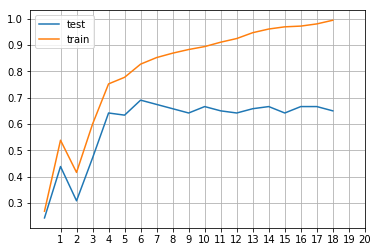

In [158]:
plt.plot(test_recall,label = 'test')
plt.plot(train_recall,label = 'train')
plt.legend()
ax = plt.axes()
ax.set_xticks(range(1,21))
plt.grid()
plt.show()

In [138]:
#we will stick with max depth of 5

In [159]:
classifier = DecisionTreeClassifier(max_depth=5,random_state=0)

In [160]:
classifier = classifier.fit(X_train,y_train)

In [161]:
preds_test = classifier.predict(X_test)

In [162]:
preds_train = classifier.predict(X_train)

In [163]:
confusion_matrix(y_test,preds_test)

array([[697,  14],
       [ 44,  79]], dtype=int64)

In [164]:
79/(79+44)

0.6422764227642277

In [165]:
confusion_matrix(y_train,preds_train)

array([[2125,   14],
       [  89,  271]], dtype=int64)

In [166]:
271/(271+89)

0.7527777777777778